In [3]:
import numpy as np 
import pandas as pd 
import re 
import requests 
from bs4 import BeautifulSoup
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import warnings
warnings.filterwarnings('ignore')

In [4]:
url = "https://www.hp.com/in-en/shop/catalogsearch/result/?q=laptops"
print(url)

https://www.hp.com/in-en/shop/catalogsearch/result/?q=laptops


In [5]:
pages = requests.get(url)
print(pages)

<Response [200]>


<!DOCTYPE html>
<html lang="en-in">
<head>
<link href="//cdn-eu.dynamicyield.com" rel="preconnect"/>
<link href="//st-eu.dynamicyield.com" rel="preconnect"/>
<link href="//rcom-eu.dynamicyield.com" rel="preconnect"/>
<link href="//cdn-eu.dynamicyield.com" rel="dns-prefetch"/>
<link href="//st-eu.dynamicyield.com" rel="dns-prefetch"/>
<link href="//rcom-eu.dynamicyield.com" rel="dns-prefetch"/>
<script>
    var BASE_URL = 'https://www.hp.com/in-en/shop/';
    var COUNTRY_CODE = 'IN';
    var require = {
        "baseUrl": "https://in-media.apjonlinecdn.com/static/version1742335944/frontend/HPOLS/stellar/en_US"
    };
</script>
<meta charset="utf-8"/>
<meta content="HP India’s most complete online store for Laptops, PCs, Tablets, Monitors, Printers, Inks &amp; Toners, Workstations, Accessories and more! Largest selection for HP brands at lowest price. Payment options - COD, EMI, Credit card, Debit card &amp; more. Buy Now!" name="description"/>
<meta content="HP Online Shopping in India,
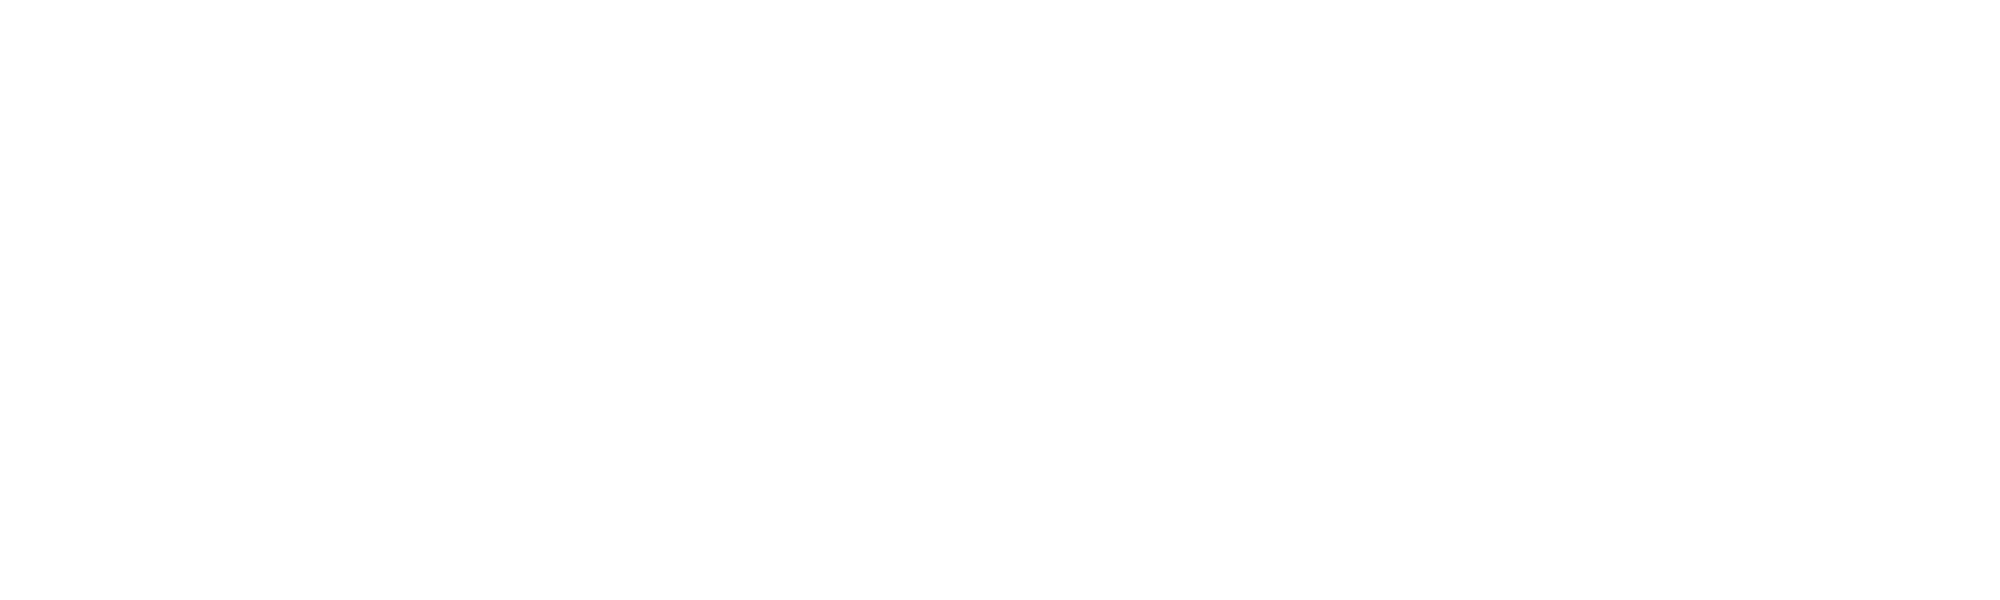

In [6]:
soup = BeautifulSoup(pages.text) 
soup

In [7]:
brand=[] 
new_price=[]
old_price=[]
emi=[]
features=[]
for i in soup.find_all("div","product-item-info simple"): 
    brand.append(i.find("h2","plp-h2-title stellar-title__small").text)
    old_price.append(i.find("span","price").text)
    new_price.append(i.find("span","price-wrapper price-including-tax").text)
    features.append(i.find("div","product-desc-features stellar-body__small").text)
    emi.append(i.find("div","msi-staging stellar-body__extra-small").text)

In [8]:
len(brand)
len(new_price)
len(old_price)
len(emi)
len(features)

24

24

24

24

24

In [9]:
brand = [] 
old_price = [] 
new_price = []
emi = []
features = []  


for i in soup.find_all("div" ,"product-item-info simple"):
    a = i.find("h2" ,"plp-h2-title stellar-title__small")
    if a is None:
        brand.append(np.nan)
    else:
        brand.append(a.text)

    
    b = i.find("div","prices")
    if b is None:
        old_price.append(np.nan)
    else:
        old_price.append(b.text)

    
    c = i.find("div" ,"price-box price-final_price")
    if c is None:
        new_price.append(np.nan)
    else:
        new_price.append(c.text)

   
    d = i.find("div" ,"msi-staging stellar-body__extra-small")
    if d is None:
        emi.append(np.nan)
    else:
        emi.append(d.text)

    e = i.find("div" ,"product-desc-features stellar-body__small")
    if e is None:
        features.append(np.nan)
    else:
        features.append(e.text)


In [10]:
brand = [] 
old_price = [] 
new_price = []
emi = []
features = [] 

for i in range(1,50):
    m_url = f"https://www.hp.com/in-en/shop/catalogsearch/result{i}" 

    page1 = requests.get(m_url)
    print(page1)
    
    soup=BeautifulSoup(page1.text)


    for i  in soup.find_all("h2" ,"plp-h2-title stellar-title__small"):
     brand.append(i.text)

    for i  in soup.find_all("div","prices"):
     old_price.append(i.text)

    for i  in soup.find_all("div" ,"price-box price-final_price"):
     new_price.append(i.text) 

    for i  in soup.find_all("div" ,"msi-staging stellar-body__extra-small"):
     emi.append(i.text) 

    for i  in soup.find_all("div" ,"product-desc-features stellar-body__small"):
     features.append(i.text)

<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>


In [10]:
print(len(brand))
print(len(old_price))
print(len(new_price))
print(len(emi))
print(len(features))


0
1127
1127
0
0


In [14]:
brand=[] 
new_price=[]
old_price=[]
emi=[]
features=[]
for i in soup.find_all("div","product-item-info simple"): 
    brand.append(i.find("h2","plp-h2-title stellar-title__small").text)
    old_price.append(i.find("span","price").text)
    new_price.append(i.find("span","price-wrapper price-including-tax").text)
    features.append(i.find("div","product-desc-features stellar-body__small").text)
    emi.append(i.find("div","msi-staging stellar-body__extra-small").text)





import requests
from bs4 import BeautifulSoup
import numpy as np
import time

brand = [] 
old_price = [] 
new_price = []
emi = []
features = [] 

for i in range(1, 50):
    m_url = f"https://www.hp.com/in-en/shop/catalogsearch/result?page={i}"  

    page1 = requests.get(m_url)
    print(f"Fetching: {m_url} -> Status: {page1.status_code}")
    
    time.sleep(2)

    
    soup = BeautifulSoup(page1.text, "html.parser")

    laptops = soup.find_all("div", class_="product-item-info")  

    for laptop in laptops:
        brand_name = laptop.find("h2", class_="plp-h2-title stellar-title__small")  
        brand.append(brand_name.text.strip() if brand_name else "N/A")

        oldprice = laptop.find("span", class_="price") 
        old_price.append(oldprice.text.strip() if oldprice else "N/A")


        newprice = laptop.find("span", class_="price-wrapper price-including-tax")
        new_price.append(newprice.text.strip() if newprice else "N/A")

        EMI = laptop.find("div", class_="msi-staging stellar-body__extra-small")
        emi.append(EMI.text.strip() if EMI else "N/A")

        Features = laptop.find("div", class_="product-desc-features stellar-body__small")
        features.append(Features.text.strip() if Features else "N/A")

brand = np.array(brand, dtype=object)
old_price = np.array(old_price, dtype=object)
new_price = np.array(new_price, dtype=object)
emi = np.array(emi, dtype=object)
features = np.array(features, dtype=object)

print("Brand Length:", len(brand))
print("Old Price Length:", len(old_price))
print("New Price Length:", len(new_price))
print("EMI Length:", len(emi))
print("Features Length:", len(features))


Fetching: https://www.hp.com/in-en/shop/catalogsearch/result?page=1 -> Status: 200
Fetching: https://www.hp.com/in-en/shop/catalogsearch/result?page=2 -> Status: 200
Fetching: https://www.hp.com/in-en/shop/catalogsearch/result?page=3 -> Status: 200
Fetching: https://www.hp.com/in-en/shop/catalogsearch/result?page=4 -> Status: 200
Fetching: https://www.hp.com/in-en/shop/catalogsearch/result?page=5 -> Status: 200
Fetching: https://www.hp.com/in-en/shop/catalogsearch/result?page=6 -> Status: 200
Fetching: https://www.hp.com/in-en/shop/catalogsearch/result?page=7 -> Status: 200
Fetching: https://www.hp.com/in-en/shop/catalogsearch/result?page=8 -> Status: 200
Fetching: https://www.hp.com/in-en/shop/catalogsearch/result?page=9 -> Status: 200
Fetching: https://www.hp.com/in-en/shop/catalogsearch/result?page=10 -> Status: 200
Fetching: https://www.hp.com/in-en/shop/catalogsearch/result?page=11 -> Status: 200
Fetching: https://www.hp.com/in-en/shop/catalogsearch/result?page=12 -> Status: 200
F

In [12]:
df = pd.DataFrame({"brand":brand,"price":new_price,"oldprice":old_price,"emi":emi,"features":features})
df.head() 

,brand,price,oldprice,emi,features
0,HP DeskJet 2820 All-in-One Printer WiFi Print ...,"₹5,499","₹7,435",Interest free installment starting from ₹611/m*,A4 Color DeskJet All-in-One Printer; Perfect f...
1,HP Smart Tank 589 All-in-One Printer,"₹12,999","₹16,936","Interest free installment starting from ₹1,444/m*","A4 Colour Smart Tank All-in-One Printer, Perfe..."
2,HP DesignJet T250 24 (61 cm) Compact Large For...,"₹79,900","₹111,196","Interest free installment starting from ₹8,878/m*","A1 Colour HP DesignJet Large Format Printer, P..."
3,HP Pavilion Plus 35.6 cm (14) Laptop 14-ew0116...,"₹76,999","₹80,658","Interest free installment starting from ₹6,417/m*",13th Generation Intel® Core™ i5 processor\nWin...
4,HP Smart Tank 670 All-in-One Printer,"₹18,999","₹22,796","Interest free installment starting from ₹2,111/m*","A4 Color Smart Tank All-in-One Printer, Perfec..."


In [13]:
import re
import warnings

In [14]:
df['features']

0       A4 Color DeskJet All-in-One Printer; Perfect f...
1       A4 Colour Smart Tank All-in-One Printer, Perfe...
2       A1 Colour HP DesignJet Large Format Printer, P...
3       13th Generation Intel® Core™ i5 processor\nWin...
4       A4 Color Smart Tank All-in-One Printer, Perfec...
                              ...                        
1171    A4 Colour Smart Tank All-in-One Printer, Perfe...
1172    13th Generation Intel® Core™ i7 processor\nWin...
1173    A4 Black and White Laserjet Printer, Perfect f...
1174    A4 Color DeskJet Ink Advantage All-in-One Prin...
1175    12th Generation Intel® Core™ i3 processor\nWin...
Name: features, Length: 1176, dtype: object

In [15]:
df["Display"] = df["features"].apply(lambda x: re.findall("(\d[0-9]\.\d) cm",x)[0] if len(re.findall("(\d[0-9]\.\d) cm",x))>0 else np.nan)
df["RAM"] = df["features"].apply(lambda x: re.findall("(\d+\s*GB\s*(?:DDR\d|LPDDR\d(?:x)?)(?:-\d+)?)",x)[0] if len(re.findall("(\d+\s*GB\s*(?:DDR\d|LPDDR\d(?:x)?)(?:-\d+)?)",
x))>0 else np.nan)
df["SSD"] = df["features"].apply(lambda x: re.findall("(\d+\s*(?:GB|TB))\s*SSD",x)[0] if len(re.findall("(\d+\s*(?:GB|TB))\s*SSD",x))>0 else np.nan)
df["Gneration"] = df["features"].apply(lambda x: re.findall("(\d{1,2})(?:th|nd)\s+Generation",x)[0] if len(re.findall("(\d{1,2})(?:th|nd)\s+Generation",x))>0 else np.nan)

In [16]:
df.head()

,brand,price,oldprice,emi,features,Display,RAM,SSD,Gneration
0,HP DeskJet 2820 All-in-One Printer WiFi Print ...,"₹5,499","₹7,435",Interest free installment starting from ₹611/m*,A4 Color DeskJet All-in-One Printer; Perfect f...,NaN,NaN,NaN,NaN
1,HP Smart Tank 589 All-in-One Printer,"₹12,999","₹16,936","Interest free installment starting from ₹1,444/m*","A4 Colour Smart Tank All-in-One Printer, Perfe...",NaN,NaN,NaN,NaN
2,HP DesignJet T250 24 (61 cm) Compact Large For...,"₹79,900","₹111,196","Interest free installment starting from ₹8,878/m*","A1 Colour HP DesignJet Large Format Printer, P...",NaN,NaN,NaN,NaN
3,HP Pavilion Plus 35.6 cm (14) Laptop 14-ew0116...,"₹76,999","₹80,658","Interest free installment starting from ₹6,417/m*",13th Generation Intel® Core™ i5 processor\nWin...,35.6,16 GB LPDDR5x,512 GB,13
4,HP Smart Tank 670 All-in-One Printer,"₹18,999","₹22,796","Interest free installment starting from ₹2,111/m*","A4 Color Smart Tank All-in-One Printer, Perfec...",NaN,NaN,NaN,NaN


In [17]:
df["Windows"] = df["features"].apply(lambda x: re.findall("Windows\s\d+",x)[0] if len(re.findall("Windows\s\d+",x))>0 else np.nan)

In [18]:
df.head()

,brand,price,oldprice,emi,features,Display,RAM,SSD,Gneration,Windows
0,HP DeskJet 2820 All-in-One Printer WiFi Print ...,"₹5,499","₹7,435",Interest free installment starting from ₹611/m*,A4 Color DeskJet All-in-One Printer; Perfect f...,NaN,NaN,NaN,NaN,NaN
1,HP Smart Tank 589 All-in-One Printer,"₹12,999","₹16,936","Interest free installment starting from ₹1,444/m*","A4 Colour Smart Tank All-in-One Printer, Perfe...",NaN,NaN,NaN,NaN,NaN
2,HP DesignJet T250 24 (61 cm) Compact Large For...,"₹79,900","₹111,196","Interest free installment starting from ₹8,878/m*","A1 Colour HP DesignJet Large Format Printer, P...",NaN,NaN,NaN,NaN,NaN
3,HP Pavilion Plus 35.6 cm (14) Laptop 14-ew0116...,"₹76,999","₹80,658","Interest free installment starting from ₹6,417/m*",13th Generation Intel® Core™ i5 processor\nWin...,35.6,16 GB LPDDR5x,512 GB,13,Windows 11
4,HP Smart Tank 670 All-in-One Printer,"₹18,999","₹22,796","Interest free installment starting from ₹2,111/m*","A4 Color Smart Tank All-in-One Printer, Perfec...",NaN,NaN,NaN,NaN,NaN


In [19]:
df["Gneration"] = df["features"].apply(lambda x: re.findall("\si\d",x)[0] if len(re.findall("\si\d",x))>0 else np.nan)
df["Colour"] = df["brand"].apply(lambda x: re.findall("(Silver|Black|Blue|Gold|White)",x)[0] if len(re.findall("(Silver|Black|Blue|Gold|White)",x))>0 else np.nan)

In [20]:
df.head()

,brand,price,oldprice,emi,features,Display,RAM,SSD,Gneration,Windows,Colour
0,HP DeskJet 2820 All-in-One Printer WiFi Print ...,"₹5,499","₹7,435",Interest free installment starting from ₹611/m*,A4 Color DeskJet All-in-One Printer; Perfect f...,NaN,NaN,NaN,NaN,NaN,NaN
1,HP Smart Tank 589 All-in-One Printer,"₹12,999","₹16,936","Interest free installment starting from ₹1,444/m*","A4 Colour Smart Tank All-in-One Printer, Perfe...",NaN,NaN,NaN,NaN,NaN,NaN
2,HP DesignJet T250 24 (61 cm) Compact Large For...,"₹79,900","₹111,196","Interest free installment starting from ₹8,878/m*","A1 Colour HP DesignJet Large Format Printer, P...",NaN,NaN,NaN,NaN,NaN,NaN
3,HP Pavilion Plus 35.6 cm (14) Laptop 14-ew0116...,"₹76,999","₹80,658","Interest free installment starting from ₹6,417/m*",13th Generation Intel® Core™ i5 processor\nWin...,35.6,16 GB LPDDR5x,512 GB,i5,Windows 11,Silver
4,HP Smart Tank 670 All-in-One Printer,"₹18,999","₹22,796","Interest free installment starting from ₹2,111/m*","A4 Color Smart Tank All-in-One Printer, Perfec...",NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df.head()

,brand,price,oldprice,emi,features,Display,RAM,SSD,Gneration,Windows,Colour
0,HP DeskJet 2820 All-in-One Printer WiFi Print ...,"₹5,499","₹7,435",Interest free installment starting from ₹611/m*,A4 Color DeskJet All-in-One Printer; Perfect f...,NaN,NaN,NaN,NaN,NaN,NaN
1,HP Smart Tank 589 All-in-One Printer,"₹12,999","₹16,936","Interest free installment starting from ₹1,444/m*","A4 Colour Smart Tank All-in-One Printer, Perfe...",NaN,NaN,NaN,NaN,NaN,NaN
2,HP DesignJet T250 24 (61 cm) Compact Large For...,"₹79,900","₹111,196","Interest free installment starting from ₹8,878/m*","A1 Colour HP DesignJet Large Format Printer, P...",NaN,NaN,NaN,NaN,NaN,NaN
3,HP Pavilion Plus 35.6 cm (14) Laptop 14-ew0116...,"₹76,999","₹80,658","Interest free installment starting from ₹6,417/m*",13th Generation Intel® Core™ i5 processor\nWin...,35.6,16 GB LPDDR5x,512 GB,i5,Windows 11,Silver
4,HP Smart Tank 670 All-in-One Printer,"₹18,999","₹22,796","Interest free installment starting from ₹2,111/m*","A4 Color Smart Tank All-in-One Printer, Perfec...",NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df['OldPrice']=df['oldprice'].str.replace('₹',' ').str.replace(',','')

In [23]:
df["Ram"] = df["RAM"].apply(lambda x: re.findall(r"\d+\sGB", str(x))[0] if re.findall(r"\d+\sGB", str(x)) else np.nan)


In [24]:
df.head()

,brand,price,oldprice,emi,features,Display,RAM,SSD,Gneration,Windows,Colour,OldPrice,Ram
0,HP DeskJet 2820 All-in-One Printer WiFi Print ...,"₹5,499","₹7,435",Interest free installment starting from ₹611/m*,A4 Color DeskJet All-in-One Printer; Perfect f...,NaN,NaN,NaN,NaN,NaN,NaN,7435,NaN
1,HP Smart Tank 589 All-in-One Printer,"₹12,999","₹16,936","Interest free installment starting from ₹1,444/m*","A4 Colour Smart Tank All-in-One Printer, Perfe...",NaN,NaN,NaN,NaN,NaN,NaN,16936,NaN
2,HP DesignJet T250 24 (61 cm) Compact Large For...,"₹79,900","₹111,196","Interest free installment starting from ₹8,878/m*","A1 Colour HP DesignJet Large Format Printer, P...",NaN,NaN,NaN,NaN,NaN,NaN,111196,NaN
3,HP Pavilion Plus 35.6 cm (14) Laptop 14-ew0116...,"₹76,999","₹80,658","Interest free installment starting from ₹6,417/m*",13th Generation Intel® Core™ i5 processor\nWin...,35.6,16 GB LPDDR5x,512 GB,i5,Windows 11,Silver,80658,16 GB
4,HP Smart Tank 670 All-in-One Printer,"₹18,999","₹22,796","Interest free installment starting from ₹2,111/m*","A4 Color Smart Tank All-in-One Printer, Perfec...",NaN,NaN,NaN,NaN,NaN,NaN,22796,NaN


In [25]:
df['RAM']=df['Ram'].str.replace('GB',' ')

In [26]:
df.drop(columns=['Ram'],inplace=True)

In [27]:
df.head()

,brand,price,oldprice,emi,features,Display,RAM,SSD,Gneration,Windows,Colour,OldPrice
0,HP DeskJet 2820 All-in-One Printer WiFi Print ...,"₹5,499","₹7,435",Interest free installment starting from ₹611/m*,A4 Color DeskJet All-in-One Printer; Perfect f...,NaN,NaN,NaN,NaN,NaN,NaN,7435
1,HP Smart Tank 589 All-in-One Printer,"₹12,999","₹16,936","Interest free installment starting from ₹1,444/m*","A4 Colour Smart Tank All-in-One Printer, Perfe...",NaN,NaN,NaN,NaN,NaN,NaN,16936
2,HP DesignJet T250 24 (61 cm) Compact Large For...,"₹79,900","₹111,196","Interest free installment starting from ₹8,878/m*","A1 Colour HP DesignJet Large Format Printer, P...",NaN,NaN,NaN,NaN,NaN,NaN,111196
3,HP Pavilion Plus 35.6 cm (14) Laptop 14-ew0116...,"₹76,999","₹80,658","Interest free installment starting from ₹6,417/m*",13th Generation Intel® Core™ i5 processor\nWin...,35.6,16,512 GB,i5,Windows 11,Silver,80658
4,HP Smart Tank 670 All-in-One Printer,"₹18,999","₹22,796","Interest free installment starting from ₹2,111/m*","A4 Color Smart Tank All-in-One Printer, Perfec...",NaN,NaN,NaN,NaN,NaN,NaN,22796


In [28]:
df['windows']=df['Windows'].str.replace('Windows',' ')
df.drop(columns=['Windows'],inplace=True)
df['SSD']=df['SSD'].str.replace('GB',' ')
df["EMI"] = df["emi"].apply(lambda x: re.findall("₹\d\,\d+",x)[0] if len(re.findall("₹\d\,\d+",x))>0 else np.nan)
df['EMI']=df['EMI'].str.replace('₹',' ').str.replace(',','')

In [29]:
df.head()

,brand,price,oldprice,emi,features,Display,RAM,SSD,Gneration,Colour,OldPrice,windows,EMI
0,HP DeskJet 2820 All-in-One Printer WiFi Print ...,"₹5,499","₹7,435",Interest free installment starting from ₹611/m*,A4 Color DeskJet All-in-One Printer; Perfect f...,NaN,NaN,NaN,NaN,NaN,7435,NaN,NaN
1,HP Smart Tank 589 All-in-One Printer,"₹12,999","₹16,936","Interest free installment starting from ₹1,444/m*","A4 Colour Smart Tank All-in-One Printer, Perfe...",NaN,NaN,NaN,NaN,NaN,16936,NaN,1444
2,HP DesignJet T250 24 (61 cm) Compact Large For...,"₹79,900","₹111,196","Interest free installment starting from ₹8,878/m*","A1 Colour HP DesignJet Large Format Printer, P...",NaN,NaN,NaN,NaN,NaN,111196,NaN,8878
3,HP Pavilion Plus 35.6 cm (14) Laptop 14-ew0116...,"₹76,999","₹80,658","Interest free installment starting from ₹6,417/m*",13th Generation Intel® Core™ i5 processor\nWin...,35.6,16,512,i5,Silver,80658,11,6417
4,HP Smart Tank 670 All-in-One Printer,"₹18,999","₹22,796","Interest free installment starting from ₹2,111/m*","A4 Color Smart Tank All-in-One Printer, Perfec...",NaN,NaN,NaN,NaN,NaN,22796,NaN,2111


In [30]:
# df.drop(columns=['emi'],inplace=True)
df.drop(columns=['oldprice'],inplace=True)

In [31]:
df.head()

,brand,price,emi,features,Display,RAM,SSD,Gneration,Colour,OldPrice,windows,EMI
0,HP DeskJet 2820 All-in-One Printer WiFi Print ...,"₹5,499",Interest free installment starting from ₹611/m*,A4 Color DeskJet All-in-One Printer; Perfect f...,NaN,NaN,NaN,NaN,NaN,7435,NaN,NaN
1,HP Smart Tank 589 All-in-One Printer,"₹12,999","Interest free installment starting from ₹1,444/m*","A4 Colour Smart Tank All-in-One Printer, Perfe...",NaN,NaN,NaN,NaN,NaN,16936,NaN,1444
2,HP DesignJet T250 24 (61 cm) Compact Large For...,"₹79,900","Interest free installment starting from ₹8,878/m*","A1 Colour HP DesignJet Large Format Printer, P...",NaN,NaN,NaN,NaN,NaN,111196,NaN,8878
3,HP Pavilion Plus 35.6 cm (14) Laptop 14-ew0116...,"₹76,999","Interest free installment starting from ₹6,417/m*",13th Generation Intel® Core™ i5 processor\nWin...,35.6,16,512,i5,Silver,80658,11,6417
4,HP Smart Tank 670 All-in-One Printer,"₹18,999","Interest free installment starting from ₹2,111/m*","A4 Color Smart Tank All-in-One Printer, Perfec...",NaN,NaN,NaN,NaN,NaN,22796,NaN,2111


In [32]:
df.dtypes

brand        object
price        object
emi          object
features     object
Display      object
RAM          object
SSD          object
Gneration    object
Colour       object
OldPrice     object
windows      object
EMI          object
dtype: object

In [33]:
df['Price']=df['price'].str.replace('₹',' ').str.replace(',','')

In [34]:
df.drop(columns=['price'],inplace=True)


In [35]:
df.columns

Index(['brand', 'emi', 'features', 'Display', 'RAM', 'SSD', 'Gneration',
       'Colour', 'OldPrice', 'windows', 'EMI', 'Price'],
      dtype='object')

In [36]:
df.head()

,brand,emi,features,Display,RAM,SSD,Gneration,Colour,OldPrice,windows,EMI,Price
0,HP DeskJet 2820 All-in-One Printer WiFi Print ...,Interest free installment starting from ₹611/m*,A4 Color DeskJet All-in-One Printer; Perfect f...,NaN,NaN,NaN,NaN,NaN,7435,NaN,NaN,5499
1,HP Smart Tank 589 All-in-One Printer,"Interest free installment starting from ₹1,444/m*","A4 Colour Smart Tank All-in-One Printer, Perfe...",NaN,NaN,NaN,NaN,NaN,16936,NaN,1444,12999
2,HP DesignJet T250 24 (61 cm) Compact Large For...,"Interest free installment starting from ₹8,878/m*","A1 Colour HP DesignJet Large Format Printer, P...",NaN,NaN,NaN,NaN,NaN,111196,NaN,8878,79900
3,HP Pavilion Plus 35.6 cm (14) Laptop 14-ew0116...,"Interest free installment starting from ₹6,417/m*",13th Generation Intel® Core™ i5 processor\nWin...,35.6,16,512,i5,Silver,80658,11,6417,76999
4,HP Smart Tank 670 All-in-One Printer,"Interest free installment starting from ₹2,111/m*","A4 Color Smart Tank All-in-One Printer, Perfec...",NaN,NaN,NaN,NaN,NaN,22796,NaN,2111,18999


In [37]:
df.dtypes

brand        object
emi          object
features     object
Display      object
RAM          object
SSD          object
Gneration    object
Colour       object
OldPrice     object
windows      object
EMI          object
Price        object
dtype: object

In [38]:
df.head()

,brand,emi,features,Display,RAM,SSD,Gneration,Colour,OldPrice,windows,EMI,Price
0,HP DeskJet 2820 All-in-One Printer WiFi Print ...,Interest free installment starting from ₹611/m*,A4 Color DeskJet All-in-One Printer; Perfect f...,NaN,NaN,NaN,NaN,NaN,7435,NaN,NaN,5499
1,HP Smart Tank 589 All-in-One Printer,"Interest free installment starting from ₹1,444/m*","A4 Colour Smart Tank All-in-One Printer, Perfe...",NaN,NaN,NaN,NaN,NaN,16936,NaN,1444,12999
2,HP DesignJet T250 24 (61 cm) Compact Large For...,"Interest free installment starting from ₹8,878/m*","A1 Colour HP DesignJet Large Format Printer, P...",NaN,NaN,NaN,NaN,NaN,111196,NaN,8878,79900
3,HP Pavilion Plus 35.6 cm (14) Laptop 14-ew0116...,"Interest free installment starting from ₹6,417/m*",13th Generation Intel® Core™ i5 processor\nWin...,35.6,16,512,i5,Silver,80658,11,6417,76999
4,HP Smart Tank 670 All-in-One Printer,"Interest free installment starting from ₹2,111/m*","A4 Color Smart Tank All-in-One Printer, Perfec...",NaN,NaN,NaN,NaN,NaN,22796,NaN,2111,18999


In [39]:
df

,brand,emi,features,Display,RAM,SSD,Gneration,Colour,OldPrice,windows,EMI,Price
0,HP DeskJet 2820 All-in-One Printer WiFi Print ...,Interest free installment starting from ₹611/m*,A4 Color DeskJet All-in-One Printer; Perfect f...,NaN,NaN,NaN,NaN,NaN,7435,NaN,NaN,5499
1,HP Smart Tank 589 All-in-One Printer,"Interest free installment starting from ₹1,444/m*","A4 Colour Smart Tank All-in-One Printer, Perfe...",NaN,NaN,NaN,NaN,NaN,16936,NaN,1444,12999
2,HP DesignJet T250 24 (61 cm) Compact Large For...,"Interest free installment starting from ₹8,878/m*","A1 Colour HP DesignJet Large Format Printer, P...",NaN,NaN,NaN,NaN,NaN,111196,NaN,8878,79900
3,HP Pavilion Plus 35.6 cm (14) Laptop 14-ew0116...,"Interest free installment starting from ₹6,417/m*",13th Generation Intel® Core™ i5 processor\nWin...,35.6,16,512,i5,Silver,80658,11,6417,76999
4,HP Smart Tank 670 All-in-One Printer,"Interest free installment starting from ₹2,111/m*","A4 Color Smart Tank All-in-One Printer, Perfec...",NaN,NaN,NaN,NaN,NaN,22796,NaN,2111,18999
...,...,...,...,...,...,...,...,...,...,...,...,...
1171,HP Smart Tank 580 All-in-One Printer,"Interest free installment starting from ₹1,667/m*","A4 Colour Smart Tank All-in-One Printer, Perfe...",NaN,NaN,NaN,NaN,NaN,17906,NaN,1667,14999
1172,HP 68.6 cm (27) All-in-One Desktop PC 27-cr0067in,"Interest free installment starting from ₹8,500/m*",13th Generation Intel® Core™ i7 processor\nWin...,NaN,32,1 TB,i7,NaN,112713,11,8500,101999
1173,HP LaserJet Pro P1108 plus,"Interest free installment starting from ₹1,740/m*","A4 Black and White Laserjet Printer, Perfect f...",NaN,NaN,NaN,NaN,NaN,16482,NaN,1740,15658
1174,"HP Ink Advantage 4278 Printer, Automatic Docum...",Interest free installment starting from ₹778/m*,A4 Color DeskJet Ink Advantage All-in-One Prin...,NaN,NaN,NaN,NaN,Blue,10390,NaN,NaN,6999


In [40]:
df.dtypes

brand        object
emi          object
features     object
Display      object
RAM          object
SSD          object
Gneration    object
Colour       object
OldPrice     object
windows      object
EMI          object
Price        object
dtype: object

In [41]:
import pandas as pd

# Convert numerical columns
num_cols = ['Price', 'OldPrice', 'EMI', 'RAM', 'SSD', 'windows', 'Display']
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric
    if df[col].isna().all():  
        df[col].fillna(0, inplace=True)  # Fill with 0 if all values are NaN
    else:
        df[col].fillna(df[col].mean(), inplace=True)  # Fill NaN with mean

# Define correct data types
df['Price'] = df['Price'].astype(int)
df['OldPrice'] = df['OldPrice'].astype(int)
df['EMI'] = df['EMI'].astype(int)
df['RAM'] = df['RAM'].astype(int)
df['SSD'] = df['SSD'].astype(int)
df['windows'] = df['windows'].astype(int)
df['Display'] = df['Display'].astype(float)

# Convert categorical columns
cat_cols = ['brand', 'features', 'Gneration', 'Colour']
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)  # Fill missing with mode
    df[col] = df[col].astype(str)  # Convert to string

# Print final datatypes
print(df.dtypes)
print(df.head())


brand         object
emi           object
features      object
Display      float64
RAM            int32
SSD            int32
Gneration     object
Colour        object
OldPrice       int32
windows        int32
EMI            int32
Price          int32
dtype: object
                                               brand  \
0  HP DeskJet 2820 All-in-One Printer WiFi Print ...   
1               HP Smart Tank 589 All-in-One Printer   
2  HP DesignJet T250 24 (61 cm) Compact Large For...   
3  HP Pavilion Plus 35.6 cm (14) Laptop 14-ew0116...   
4               HP Smart Tank 670 All-in-One Printer   

                                                 emi  \
0    Interest free installment starting from ₹611/m*   
1  Interest free installment starting from ₹1,444/m*   
2  Interest free installment starting from ₹8,878/m*   
3  Interest free installment starting from ₹6,417/m*   
4  Interest free installment starting from ₹2,111/m*   

                                            features    Disp

In [42]:
df.head()

,brand,emi,features,Display,RAM,SSD,Gneration,Colour,OldPrice,windows,EMI,Price
0,HP DeskJet 2820 All-in-One Printer WiFi Print ...,Interest free installment starting from ₹611/m*,A4 Color DeskJet All-in-One Printer; Perfect f...,38.407143,16,512,i5,Silver,7435,11,4966,5499
1,HP Smart Tank 589 All-in-One Printer,"Interest free installment starting from ₹1,444/m*","A4 Colour Smart Tank All-in-One Printer, Perfe...",38.407143,16,512,i5,Silver,16936,11,1444,12999
2,HP DesignJet T250 24 (61 cm) Compact Large For...,"Interest free installment starting from ₹8,878/m*","A1 Colour HP DesignJet Large Format Printer, P...",38.407143,16,512,i5,Silver,111196,11,8878,79900
3,HP Pavilion Plus 35.6 cm (14) Laptop 14-ew0116...,"Interest free installment starting from ₹6,417/m*",13th Generation Intel® Core™ i5 processor\nWin...,35.600000,16,512,i5,Silver,80658,11,6417,76999
4,HP Smart Tank 670 All-in-One Printer,"Interest free installment starting from ₹2,111/m*","A4 Color Smart Tank All-in-One Printer, Perfec...",38.407143,16,512,i5,Silver,22796,11,2111,18999


In [43]:
df.dtypes

brand         object
emi           object
features      object
Display      float64
RAM            int32
SSD            int32
Gneration     object
Colour        object
OldPrice       int32
windows        int32
EMI            int32
Price          int32
dtype: object

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.express as px
from datetime import datetime

import missingno as msno
# to install: pip install missingno

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import warnings
warnings.filterwarnings('ignore')

# choose a matplotlib style option
plt.style.use('bmh')

# choose seaborn style option
sns.set_style('darkgrid')


In [13]:
df.to_csv("Laptots.csv")

NameError: name 'df' is not defined

In [46]:
laptops_hp = pd.read_csv("Laptots.csv")

In [47]:
laptops_hp.head()

,Unnamed: 0,brand,emi,features,Display,RAM,SSD,Gneration,Colour,OldPrice,windows,EMI,Price
0,0,HP DeskJet 2820 All-in-One Printer WiFi Print ...,Interest free installment starting from ₹611/m*,A4 Color DeskJet All-in-One Printer; Perfect f...,38.407143,16,512,i5,Silver,7435,11,4966,5499
1,1,HP Smart Tank 589 All-in-One Printer,"Interest free installment starting from ₹1,444/m*","A4 Colour Smart Tank All-in-One Printer, Perfe...",38.407143,16,512,i5,Silver,16936,11,1444,12999
2,2,HP DesignJet T250 24 (61 cm) Compact Large For...,"Interest free installment starting from ₹8,878/m*","A1 Colour HP DesignJet Large Format Printer, P...",38.407143,16,512,i5,Silver,111196,11,8878,79900
3,3,HP Pavilion Plus 35.6 cm (14) Laptop 14-ew0116...,"Interest free installment starting from ₹6,417/m*",13th Generation Intel® Core™ i5 processor\nWin...,35.600000,16,512,i5,Silver,80658,11,6417,76999
4,4,HP Smart Tank 670 All-in-One Printer,"Interest free installment starting from ₹2,111/m*","A4 Color Smart Tank All-in-One Printer, Perfec...",38.407143,16,512,i5,Silver,22796,11,2111,18999


In [48]:
laptops_hp.tail()

,Unnamed: 0,brand,emi,features,Display,RAM,SSD,Gneration,Colour,OldPrice,windows,EMI,Price
1171,1171,HP Smart Tank 580 All-in-One Printer,"Interest free installment starting from ₹1,667/m*","A4 Colour Smart Tank All-in-One Printer, Perfe...",38.407143,16,512,i5,Silver,17906,11,1667,14999
1172,1172,HP 68.6 cm (27) All-in-One Desktop PC 27-cr0067in,"Interest free installment starting from ₹8,500/m*",13th Generation Intel® Core™ i7 processor\nWin...,38.407143,32,512,i7,Silver,112713,11,8500,101999
1173,1173,HP LaserJet Pro P1108 plus,"Interest free installment starting from ₹1,740/m*","A4 Black and White Laserjet Printer, Perfect f...",38.407143,16,512,i5,Silver,16482,11,1740,15658
1174,1174,"HP Ink Advantage 4278 Printer, Automatic Docum...",Interest free installment starting from ₹778/m*,A4 Color DeskJet Ink Advantage All-in-One Prin...,38.407143,16,512,i5,Blue,10390,11,4966,6999
1175,1175,"HP Laptop 35.6 cm (14) 14s-dq5138TU, Silver","Interest free installment starting from ₹3,458/m*",12th Generation Intel® Core™ i3 processor\nWin...,35.600000,8,512,i3,Silver,53134,11,3458,41499


In [49]:
laptops_hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1176 non-null   int64  
 1   brand       1176 non-null   object 
 2   emi         1176 non-null   object 
 3   features    1176 non-null   object 
 4   Display     1176 non-null   float64
 5   RAM         1176 non-null   int64  
 6   SSD         1176 non-null   int64  
 7   Gneration   1176 non-null   object 
 8   Colour      1176 non-null   object 
 9   OldPrice    1176 non-null   int64  
 10  windows     1176 non-null   int64  
 11  EMI         1176 non-null   int64  
 12  Price       1176 non-null   int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 119.6+ KB


In [50]:
laptops_hp.dtypes

Unnamed: 0      int64
brand          object
emi            object
features       object
Display       float64
RAM             int64
SSD             int64
Gneration      object
Colour         object
OldPrice        int64
windows         int64
EMI             int64
Price           int64
dtype: object

In [51]:
laptops_hp.describe()

,Unnamed: 0,Display,RAM,SSD,OldPrice,windows,EMI,Price
count,1176.000000,1176.000000,1176.000000,1176.0,1176.000000,1176.0,1176.000000,1176.000000
mean,587.500000,38.407143,16.000000,512.0,69245.125000,11.0,4966.708333,58897.333333
std,339.626265,2.017138,4.001702,0.0,46544.647958,0.0,2285.864052,38763.347842
min,0.000000,35.600000,8.000000,512.0,7435.000000,11.0,1444.000000,5499.000000
25%,293.750000,37.705357,16.000000,512.0,21573.500000,11.0,3315.750000,18163.750000
50%,587.500000,38.407143,16.000000,512.0,69724.500000,11.0,4966.000000,62249.000000
75%,881.250000,39.600000,16.000000,512.0,97266.500000,11.0,6510.500000,81549.750000
max,1175.000000,43.900000,32.000000,512.0,191668.000000,11.0,8878.000000,141999.000000


In [52]:
laptops_hp.shape

(1176, 13)

In [53]:
laptops_hp.describe()

,Unnamed: 0,Display,RAM,SSD,OldPrice,windows,EMI,Price
count,1176.000000,1176.000000,1176.000000,1176.0,1176.000000,1176.0,1176.000000,1176.000000
mean,587.500000,38.407143,16.000000,512.0,69245.125000,11.0,4966.708333,58897.333333
std,339.626265,2.017138,4.001702,0.0,46544.647958,0.0,2285.864052,38763.347842
min,0.000000,35.600000,8.000000,512.0,7435.000000,11.0,1444.000000,5499.000000
25%,293.750000,37.705357,16.000000,512.0,21573.500000,11.0,3315.750000,18163.750000
50%,587.500000,38.407143,16.000000,512.0,69724.500000,11.0,4966.000000,62249.000000
75%,881.250000,39.600000,16.000000,512.0,97266.500000,11.0,6510.500000,81549.750000
max,1175.000000,43.900000,32.000000,512.0,191668.000000,11.0,8878.000000,141999.000000


In [54]:
laptops_hp.isna().sum().sort_values(ascending = False)

Unnamed: 0    0
brand         0
emi           0
features      0
Display       0
RAM           0
SSD           0
Gneration     0
Colour        0
OldPrice      0
windows       0
EMI           0
Price         0
dtype: int64

In [55]:
laptops_hp = laptops_hp.drop(columns=["Unnamed: 0"] ,axis=1)
laptops_hp

,brand,emi,features,Display,RAM,SSD,Gneration,Colour,OldPrice,windows,EMI,Price
0,HP DeskJet 2820 All-in-One Printer WiFi Print ...,Interest free installment starting from ₹611/m*,A4 Color DeskJet All-in-One Printer; Perfect f...,38.407143,16,512,i5,Silver,7435,11,4966,5499
1,HP Smart Tank 589 All-in-One Printer,"Interest free installment starting from ₹1,444/m*","A4 Colour Smart Tank All-in-One Printer, Perfe...",38.407143,16,512,i5,Silver,16936,11,1444,12999
2,HP DesignJet T250 24 (61 cm) Compact Large For...,"Interest free installment starting from ₹8,878/m*","A1 Colour HP DesignJet Large Format Printer, P...",38.407143,16,512,i5,Silver,111196,11,8878,79900
3,HP Pavilion Plus 35.6 cm (14) Laptop 14-ew0116...,"Interest free installment starting from ₹6,417/m*",13th Generation Intel® Core™ i5 processor\nWin...,35.600000,16,512,i5,Silver,80658,11,6417,76999
4,HP Smart Tank 670 All-in-One Printer,"Interest free installment starting from ₹2,111/m*","A4 Color Smart Tank All-in-One Printer, Perfec...",38.407143,16,512,i5,Silver,22796,11,2111,18999
...,...,...,...,...,...,...,...,...,...,...,...,...
1171,HP Smart Tank 580 All-in-One Printer,"Interest free installment starting from ₹1,667/m*","A4 Colour Smart Tank All-in-One Printer, Perfe...",38.407143,16,512,i5,Silver,17906,11,1667,14999
1172,HP 68.6 cm (27) All-in-One Desktop PC 27-cr0067in,"Interest free installment starting from ₹8,500/m*",13th Generation Intel® Core™ i7 processor\nWin...,38.407143,32,512,i7,Silver,112713,11,8500,101999
1173,HP LaserJet Pro P1108 plus,"Interest free installment starting from ₹1,740/m*","A4 Black and White Laserjet Printer, Perfect f...",38.407143,16,512,i5,Silver,16482,11,1740,15658
1174,"HP Ink Advantage 4278 Printer, Automatic Docum...",Interest free installment starting from ₹778/m*,A4 Color DeskJet Ink Advantage All-in-One Prin...,38.407143,16,512,i5,Blue,10390,11,4966,6999


In [1]:
laptops_hp.info()

NameError: name 'laptops_hp' is not defined

In [56]:
df.describe()

,Display,RAM,SSD,OldPrice,windows,EMI,Price
count,1176.000000,1176.000000,1176.0,1176.000000,1176.0,1176.000000,1176.000000
mean,38.407143,16.000000,512.0,69245.125000,11.0,4966.708333,58897.333333
std,2.017138,4.001702,0.0,46544.647958,0.0,2285.864052,38763.347842
min,35.600000,8.000000,512.0,7435.000000,11.0,1444.000000,5499.000000
25%,37.705357,16.000000,512.0,21573.500000,11.0,3315.750000,18163.750000
50%,38.407143,16.000000,512.0,69724.500000,11.0,4966.000000,62249.000000
75%,39.600000,16.000000,512.0,97266.500000,11.0,6510.500000,81549.750000
max,43.900000,32.000000,512.0,191668.000000,11.0,8878.000000,141999.000000


In [57]:
(((laptops_hp.isna().sum().sort_values(ascending = False)/len(laptops_hp))*100).astype(str) + "%")

brand        0.0%
emi          0.0%
features     0.0%
Display      0.0%
RAM          0.0%
SSD          0.0%
Gneration    0.0%
Colour       0.0%
OldPrice     0.0%
windows      0.0%
EMI          0.0%
Price        0.0%
dtype: object

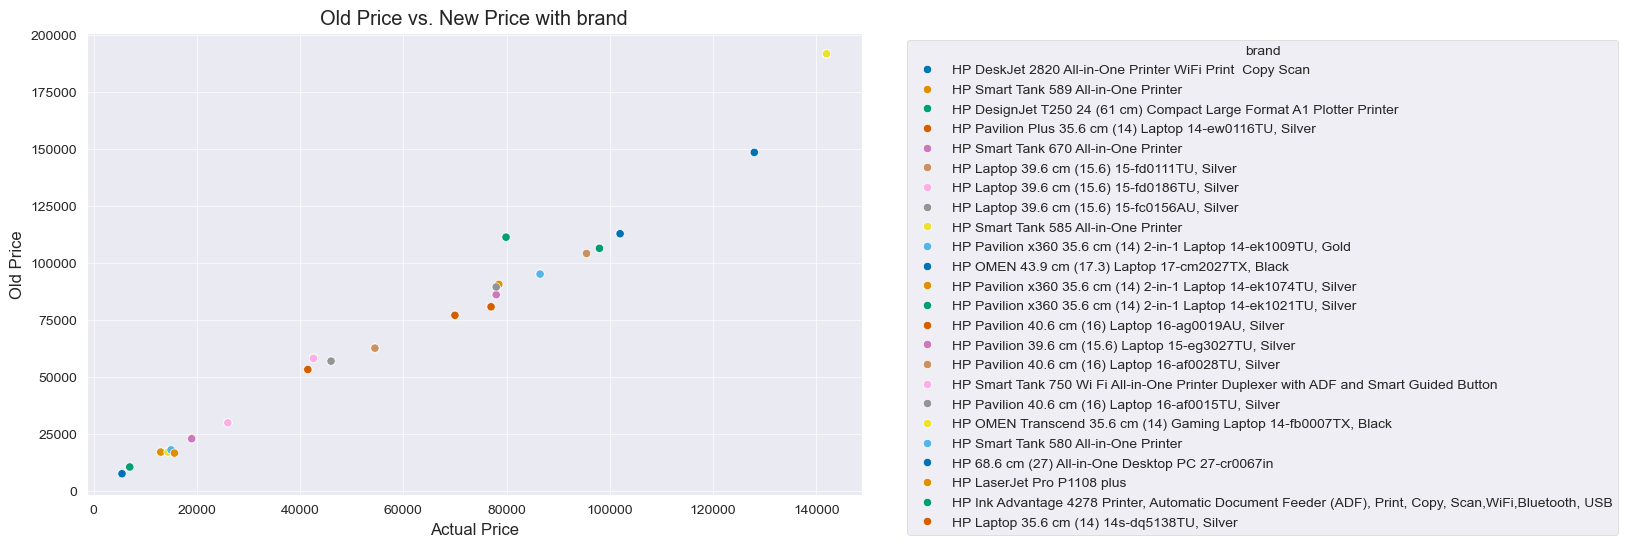

In [58]:
# difference between new price and old price with brand 

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='OldPrice', hue='brand', data=laptops_hp, palette="colorblind")
plt.title("Old Price vs. New Price with brand")
plt.xlabel("Actual Price")
plt.ylabel("Old Price")
plt.legend(title="brand", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show();

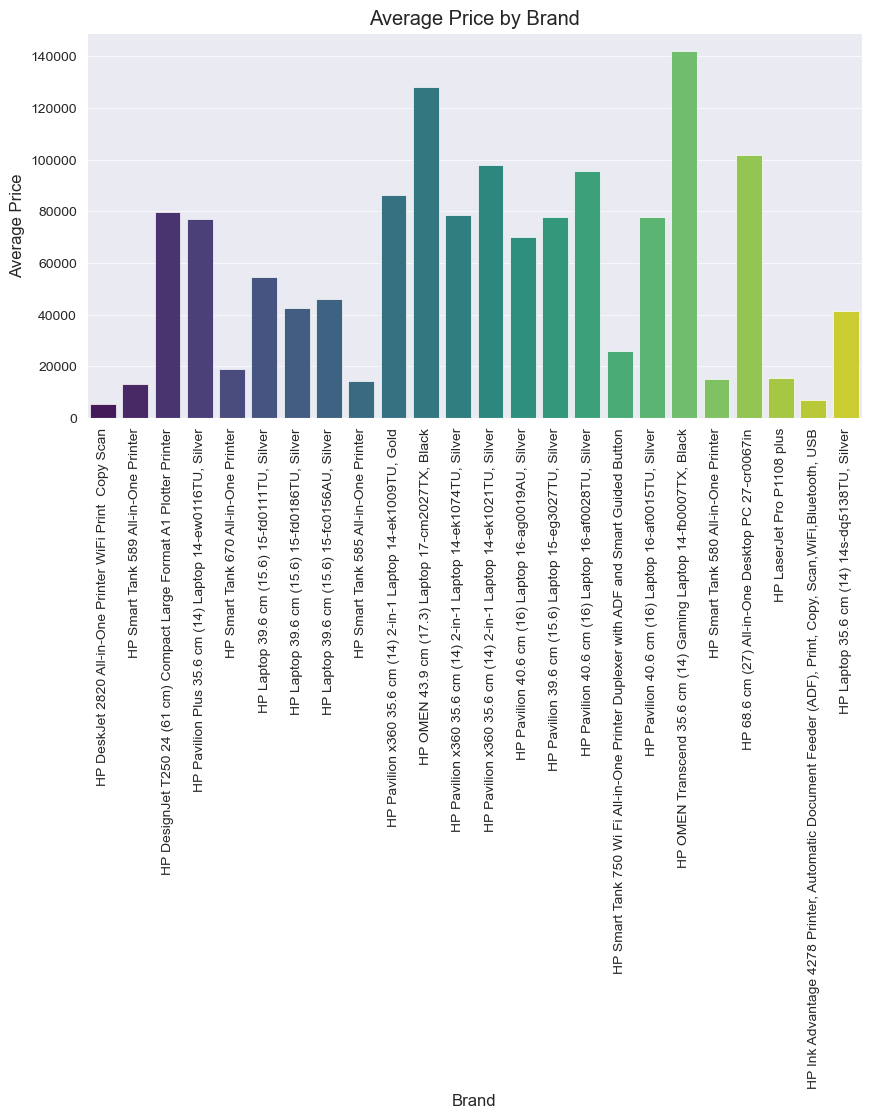

In [65]:
# Bar Chart: Average Price by Brand ###
plt.figure(figsize=(10, 5))
sns.barplot(x="brand", y="Price", data=laptops_hp, estimator=lambda x: sum(x)/len(x), palette="viridis")
plt.xticks(rotation=90)
plt.title("Average Price by Brand")
plt.xlabel("Brand")
plt.ylabel("Average Price")
plt.show();

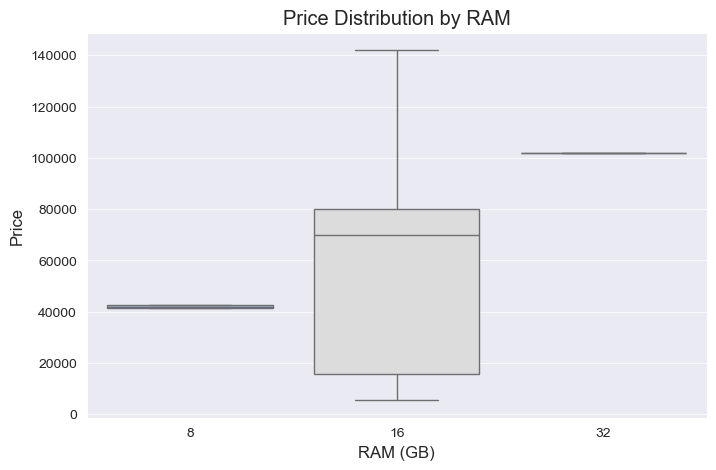

In [67]:
# Box Plot: Price by RAM ###

plt.figure(figsize=(8, 5))
sns.boxplot(x="RAM", y="Price", data=laptops_hp, palette="coolwarm")
plt.title("Price Distribution by RAM")
plt.xlabel("RAM (GB)")
plt.ylabel("Price")
plt.show();


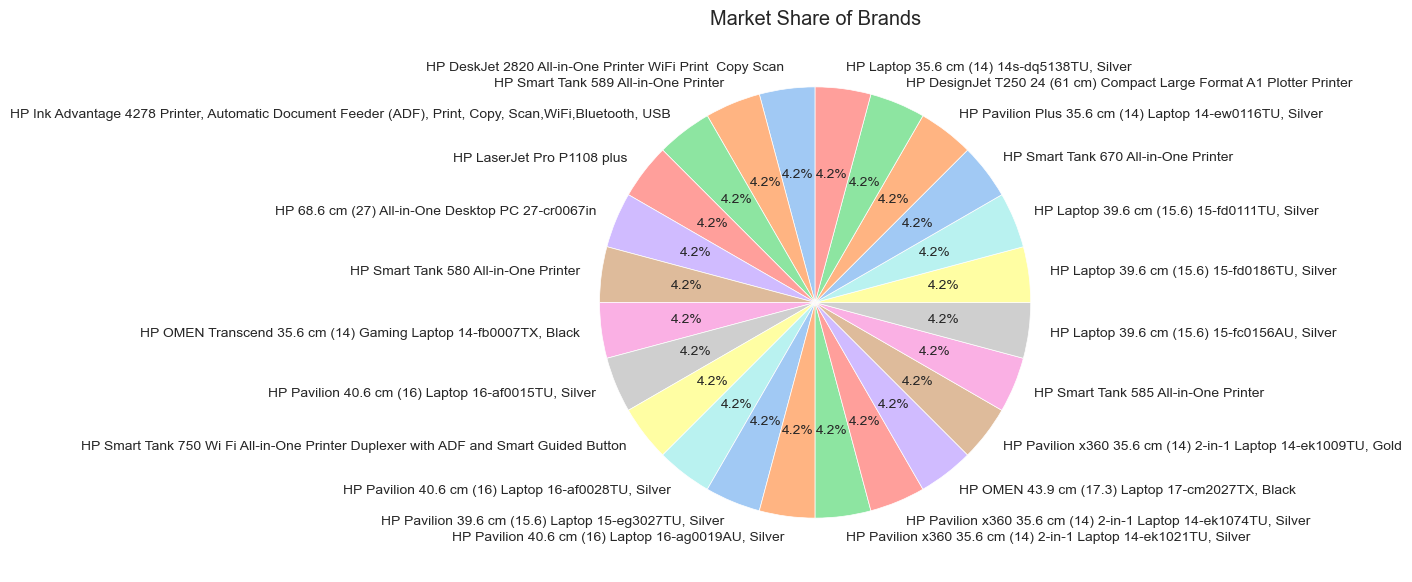

In [69]:
### 5. Pie Chart: Market Share of Brands

plt.figure(figsize=(7, 7))
df['brand'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette("pastel"), startangle=90)
plt.title("Market Share of Brands")
plt.ylabel("")
plt.show();



In [72]:
laptops_hp.columns

Index(['brand', 'emi', 'features', 'Display', 'RAM', 'SSD', 'Gneration',
       'Colour', 'OldPrice', 'windows', 'EMI', 'Price'],
      dtype='object')

<Axes: >

Text(0.5, 1.0, 'Feature Correlation Heatmap')

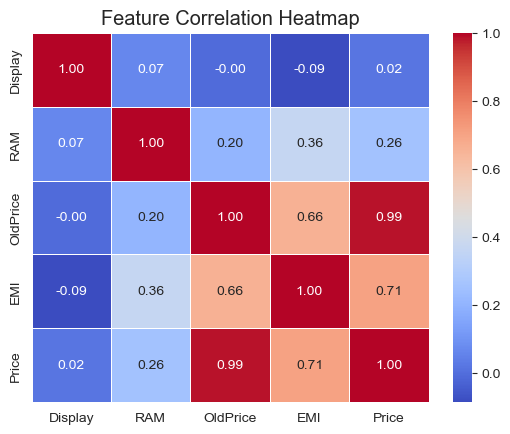

Index(['brand', 'emi', 'features', 'Display', 'RAM', 'SSD', 'Gneration',
       'Colour', 'OldPrice', 'windows', 'EMI', 'Price'],
      dtype='object')

In [93]:
### 6. Heatmap: Correlation Matrix ###

# numeric_df = df.select_dtypes(include=['number'])  # Get only numeric columns
# numeric_df = numeric_df.loc[:, ~numeric_df.columns.isin(['SSD', 'windows'])]  # Exclude specific columns

# Plot heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show();
df.columns

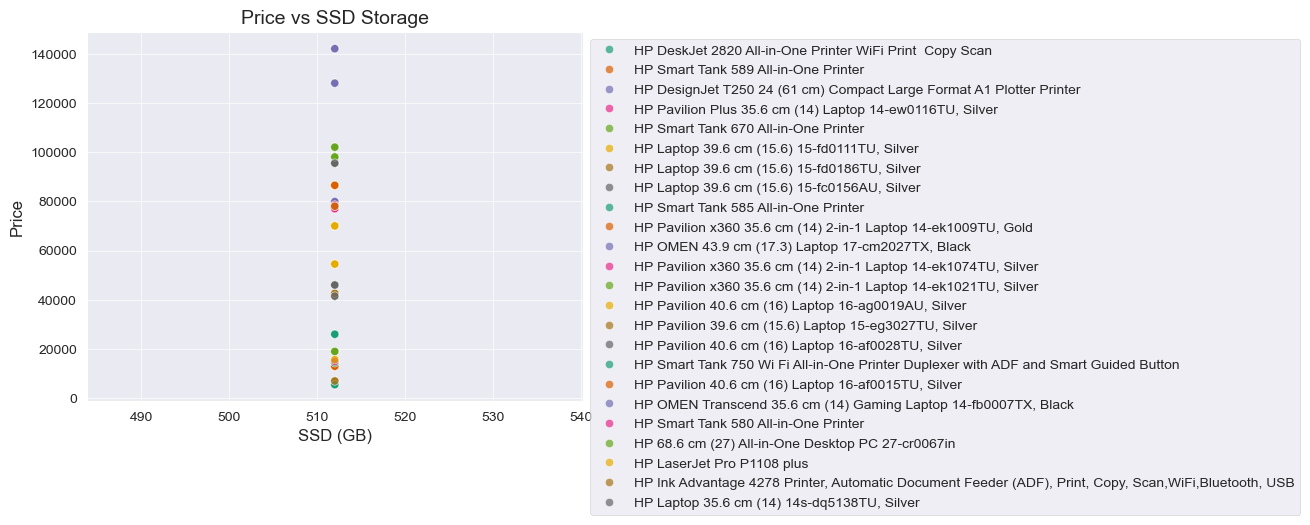

In [84]:

### 4. Scatter Plot: Price vs SSD ###
sns.scatterplot(x="SSD", y="Price", hue="brand", data=df, palette="Dark2", alpha=0.7)
plt.title("Price vs SSD Storage", fontsize=14)
plt.xlabel("SSD (GB)", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

plt.show();

In [11]:

### 1. Price Distribution Histogram ###
plt.figure(figsize=(8, 5))
sns.histplot(df['Price'], bins=30, kde=True, color="blue")
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show();

NameError: name 'plt' is not defined

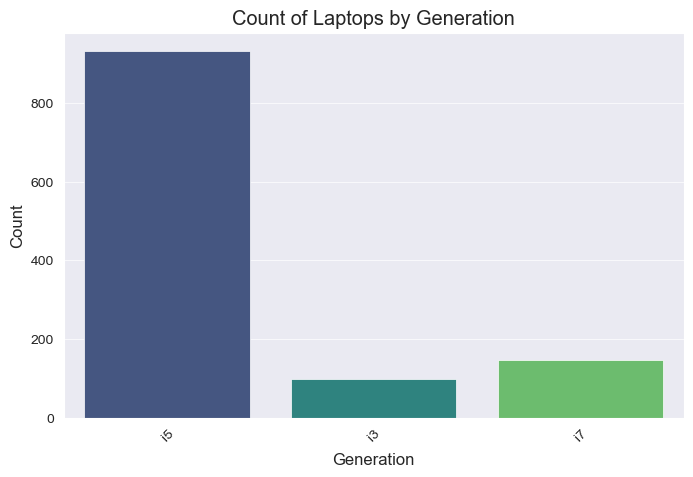

In [86]:

## 2. Count Plot: Count of Laptops by Generation ##
plt.figure(figsize=(8, 5))
sns.countplot(x="Gneration", data=laptops_hp, palette="viridis")
plt.title("Count of Laptops by Generation")
plt.xlabel("Generation")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show();

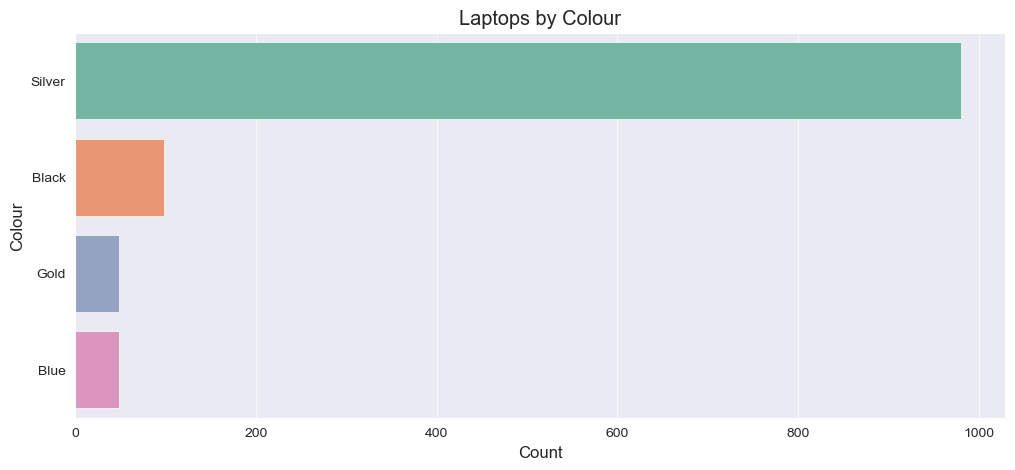

In [88]:
## 3. Count Plot: Laptops by Colour ##
plt.figure(figsize=(12, 5))
sns.countplot(y="Colour", data=df, palette="Set2", order=df["Colour"].value_counts().index)
plt.title("Laptops by Colour")
plt.xlabel("Count")
plt.ylabel("Colour")
plt.show();

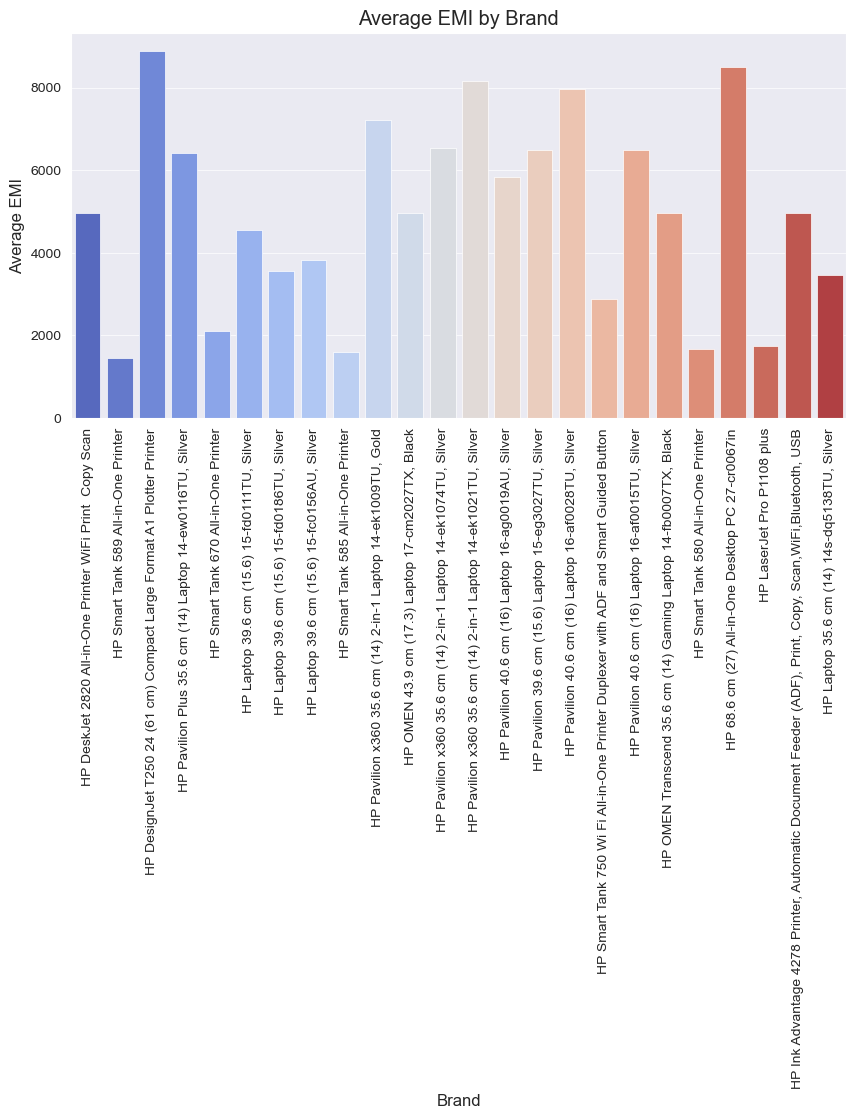

In [92]:
## 2. Bar Chart: Average EMI by Brand ##
plt.figure(figsize=(10, 5))
sns.barplot(x="brand", y="EMI", data=df, estimator=lambda x: sum(x)/len(x), palette="coolwarm")
plt.title("Average EMI by Brand")
plt.xlabel("Brand")
plt.ylabel("Average EMI")
plt.xticks(rotation=90)
plt.show();